 # LSTM

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras import losses
%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def read_data():
    # [40, 7500, 4, 1]
    import os
    files = os.listdir('train')
    all_list = []
    label = []
    for file in files:
        train = pd.read_excel('./train/' + file, encoding='utf8', header=None)
        # 加工品質量測結果:0.306
        label.append(train.get_values()[-1][0].split(':')[1])        
        
        train = np.array(train.drop(7500, axis=0))
        all_list.append(train)
        
    return np.array(all_list), np.array(label)

In [3]:
def build_train_data(train, label, pastDay=7500, futureDay=1):
    assert train.shape[0] == label.shape[0]
    
    X_train, Y_train = [], []
    for i in range(train.shape[0] - pastDay - futureDay):
        X_train.append(train[i: i + pastDay])
        Y_train.append(label[i + pastDay: i + pastDay + futureDay])
    
    return np.array(X_train), np.array(Y_train)        

In [4]:
def shuffle(X, Y):
    np.random.seed(1)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [5]:
# Split some training data to validation data
def splitData(X, Y, rate):
    
    X_train = X[int(X.shape[0] * rate): ]
    Y_train = Y[int(Y.shape[0] * rate): ]
    X_val = X[:int(X.shape[0] * rate)]
    Y_val = Y[:int(Y.shape[0] * rate)]
    
    return X_train, Y_train, X_val, Y_val

In [6]:
def build_LSTM_model(shape):
    model = Sequential()
    model.add(LSTM(10, input_shape=(7500, 4), return_sequences=False))
    
    model.add(Dense(1))
    model.compile(loss=losses.mean_squared_error, optimizer="adam")
    model.summary()
    return model

In [7]:
from keras.layers import LSTM

train, label = read_data()
X_train, Y_train, X_val, Y_val = splitData(train, label, 0.3)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=50, batch_size=5, validation_data=(X_val, Y_val), verbose=1, shuffle=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 28 samples, validate on 12 samples
Epoch 1/50
28/28 [==============================] - 46s 2s/step - loss: 0.6054 - val_loss: 0.4582
Epoch 2/50
28/28 [==============================] - 44s 2s/step - loss: 0.5339 - val_loss: 0.3415
Epoch 3/50
28/28 [==============================] - 44s 2s/step - loss: 0.3511 - val_loss: 0.1123
Epoch 4/50
28/28 [==============================] - 44s 2s/step - loss: 0.1938 - val_loss: 0.1281
Epoch 5/50
28/28 [==============================] - 45s 2s/step - loss: 0.1862 - val_loss: 0.0987
Epoch 6/50
28/28 [==============================] - 45s 2s/step - loss: 0.2024 - val_loss: 0.1215
Epoch 7/50
28/28 [==============================] - 45s 2s/step - loss: 0.1817 - val_loss: 0.1872
Epoch 8/50
28/28 [==============================] - 45s 2s/step - loss: 0.1697 - val_loss: 0.1333
Epoch 9/50
28/28 [========

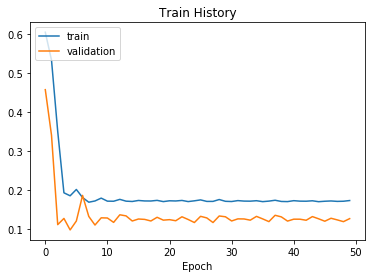

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train History')
# plt.ylabel(train)
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()